# Preprocessing the Grocery dataset

In [105]:
data_path = 'dataset/annotations/'
coco_train_file = data_path + 'instances_train.json'
coco_val_file = data_path + 'instances_val.json'

# Read the json files
import json
with open(coco_train_file) as f:
    coco_train = json.load(f)
with open(coco_val_file) as f:
    coco_val = json.load(f)

In [106]:
import pandas as pd

# Extract category IDs and names from coco_train
categories = coco_train['categories']
category_data = [(cat['id'], cat['name']) for cat in categories]

# Create a DataFrame
category_df = pd.DataFrame(category_data, columns=['Category ID', 'Category Name'])

# Sort the DataFrame by Category ID
category_df = category_df.sort_values(by='Category ID')

# Print the DataFrame
print(category_df)

    Category ID             Category Name
9             1              bottled_soda
13            2                    cheese
18            3                    Kitkat
20            4                    coffee
19            5            condensed_milk
7             6               Cooking_oil
21            7               corned beef
5             8                    garlic
14            9           instant_noodles
17           11                     lemon
10           13                Mayonnaise
6            14             peanut_butter
15           15                     pasta
0            16           pineapple juice
16           17                  crackers
1            18                        18
3            19              pink_shampoo
8            20                        20
11           21                silverswan
4            22                toothpaste
12           23               canned-tuna
2            24  GreenCross Ethyl Alcohol


In [107]:
# Add new categories and rename categories 18 and 20


# Extract category IDs and names from coco_train
categories_train = coco_train['categories']
categories_val = coco_val['categories']

# # Add new categories
# new_categories = [
#     {'id': 10, 'name': 'ketchup'},
#     {'id': 12, 'name': 'nestle_cream'}
# ]

# # Append new categories to both coco_train and coco_val
# categories_train.extend(new_categories)
# categories_val.extend(new_categories)

# Rename categories in coco_train
for category in categories_train:
    if category['id'] == 18:
        category['name'] = 'canned_sardines'
    elif category['id'] == 20:
        category['name'] = 'soap'

# Rename categories in coco_val
for category in categories_val:
    if category['id'] == 18:
        category['name'] = 'canned_sardines'
    elif category['id'] == 20:
        category['name'] = 'soap'

# Update the coco_train and coco_val dictionaries
coco_train['categories'] = categories_train
coco_val['categories'] = categories_val

# Extract category IDs and names from coco_train
categories = coco_train['categories']
category_data = [(cat['id'], cat['name']) for cat in categories]

print("Updated categories:")
# Create a DataFrame
category_df = pd.DataFrame(category_data, columns=['Category ID', 'Category Name'])

# Sort the DataFrame by Category ID
category_df = category_df.sort_values(by='Category ID')

# Print the DataFrame
print(category_df)

Updated categories:
    Category ID             Category Name
9             1              bottled_soda
13            2                    cheese
18            3                    Kitkat
20            4                    coffee
19            5            condensed_milk
7             6               Cooking_oil
21            7               corned beef
5             8                    garlic
14            9           instant_noodles
17           11                     lemon
10           13                Mayonnaise
6            14             peanut_butter
15           15                     pasta
0            16           pineapple juice
16           17                  crackers
1            18           canned_sardines
3            19              pink_shampoo
8            20                      soap
11           21                silverswan
4            22                toothpaste
12           23               canned-tuna
2            24  GreenCross Ethyl Alcohol


## Visualize images and annotations

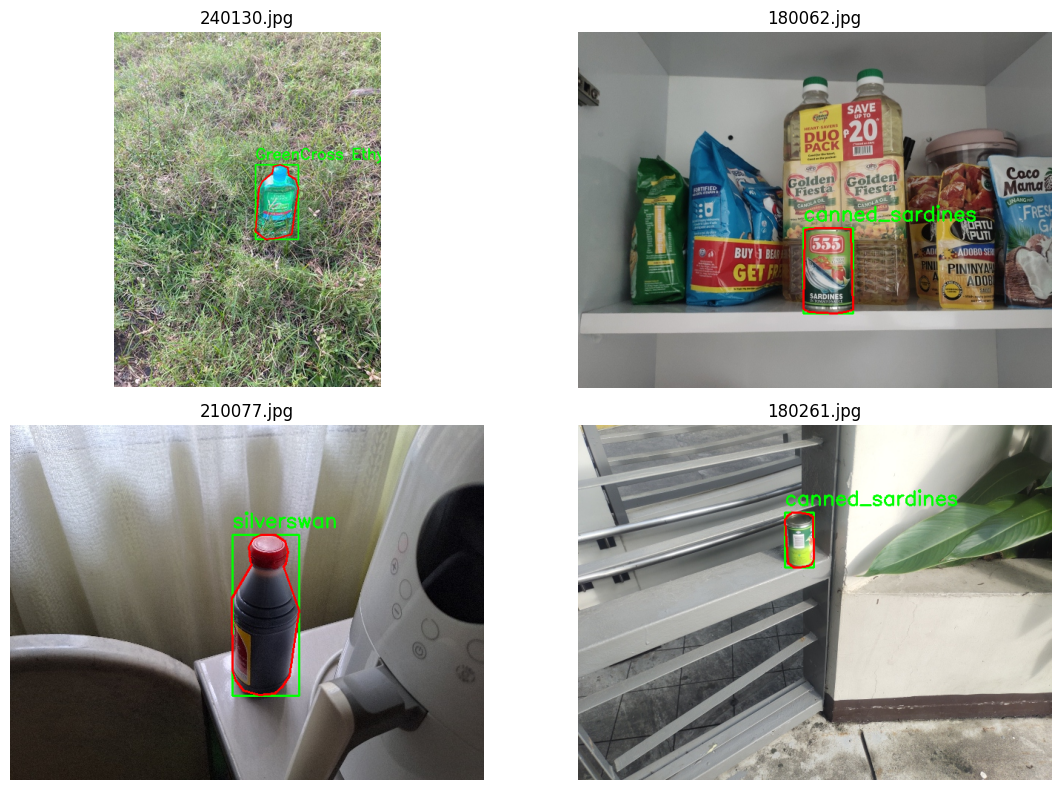

In [108]:
import cv2
import json
import os
import random
import matplotlib.pyplot as plt
import numpy as np

train = True

if train:
    image_path = 'dataset/images/train'
    coco_data = coco_train
else:
    image_path = 'dataset/images/val'
    coco_data = coco_val

# Create a dictionary to map image IDs to file names for easy access
image_id_to_filename = {img['id']: img['file_name'] for img in coco_data['images']}

# Create a dictionary to map category IDs to class names
category_id_to_name = {cat['id']: cat['name'] for cat in coco_data['categories']}

# Randomly select 4 images
selected_images = random.sample(coco_data['images'], 4)

# Filter images by the specified image IDs
# selected_image_ids = [5770,5771,5772,5773]
# selected_images = [img for img in coco_data['images'] if img['id'] in selected_image_ids]

# Define function to draw bounding boxes, segmentation, and class names
def draw_annotations(image, annotation):
    # Draw bounding box
    bbox = annotation['bbox']
    x, y, w, h = int(bbox[0]), int(bbox[1]), int(bbox[2]), int(bbox[3])
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)  # Green box
    
    # Draw segmentation mask
    if 'segmentation' in annotation:
        for segment in annotation['segmentation']:
            points = [(int(segment[i]), int(segment[i + 1])) for i in range(0, len(segment), 2)]
            points = np.array(points, dtype=np.int32)
            cv2.polylines(image, [points], isClosed=True, color=(255, 0, 0), thickness=2)  # Red line
    
    # Draw class name
    class_name = category_id_to_name[annotation['category_id']]
    cv2.putText(image, class_name, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)  # Green text
    
    return image

# Plot images with annotations
plt.figure(figsize=(12, 8))

for i, img_info in enumerate(selected_images):
    # Load image
    img_path = os.path.join(image_path, img_info['file_name'])
    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Get annotations for this image
    annotations = [ann for ann in coco_data['annotations'] if ann['image_id'] == img_info['id']]
    
    # Draw each annotation on the image
    for annotation in annotations:
        image = draw_annotations(image, annotation)
    
    # Display the image
    plt.subplot(2, 2, i + 1)
    plt.imshow(image)
    plt.axis('off')
    plt.title(img_info['file_name'])

plt.tight_layout()
plt.show()

## Get Validation set from training data

In [111]:
import os
import shutil
import random
import json

# Paths to image directories
image_path_train = 'dataset/images/train'
image_path_val = 'dataset/images/val'

# Create directories for new training and validation images
new_image_path_train = 'dataset/images/new_train'
new_image_path_val = 'dataset/images/new_val'
os.makedirs(new_image_path_train, exist_ok=True)
os.makedirs(new_image_path_val, exist_ok=True)

# Split the training data to create a new validation set
random.shuffle(coco_train['images'])
split_index = int(0.8 * len(coco_train['images']))
new_train_images = coco_train['images'][:split_index]
new_val_images = coco_train['images'][split_index:]

# Create new training and validation datasets
new_coco_train = {
    'images': new_train_images,
    'annotations': [ann for ann in coco_train['annotations'] if ann['image_id'] in {img['id'] for img in new_train_images}],
    'categories': coco_train['categories']
}

new_coco_val = {
    'images': new_val_images,
    'annotations': [ann for ann in coco_train['annotations'] if ann['image_id'] in {img['id'] for img in new_val_images}],
    'categories': coco_train['categories']
}

# Use the original validation set as the test set
new_coco_test = coco_val

# Move images to new directories based on the split
for img in new_train_images:
    src_path = os.path.join(image_path_train, img['file_name'])
    dst_path = os.path.join(new_image_path_train, img['file_name'])
    shutil.move(src_path, dst_path)

for img in new_val_images:
    src_path = os.path.join(image_path_train, img['file_name'])
    dst_path = os.path.join(new_image_path_val, img['file_name'])
    shutil.move(src_path, dst_path)

# Save the new splits to JSON files
data_path = 'dataset/annotations/'
with open(os.path.join(data_path, 'new_instances_train.json'), 'w') as f:
    json.dump(new_coco_train, f)
with open(os.path.join(data_path, 'new_instances_val.json'), 'w') as f:
    json.dump(new_coco_val, f)
with open(os.path.join(data_path, 'new_instances_test.json'), 'w') as f:
    json.dump(new_coco_test, f)

## Convert Coco to YOLO format


In [117]:
import os
import json
import numpy as np

# Define function to clip and normalize segmentation points
def clip_and_normalize_segmentation_points(segmentation, img_width, img_height):
    clipped_normalized_segmentation = []
    for segment in segmentation:
        clipped_normalized_segment = []
        for i in range(0, len(segment), 2):
            x = max(0, min(img_width, segment[i])) / img_width
            y = max(0, min(img_height, segment[i + 1])) / img_height
            clipped_normalized_segment.extend([x, y])
        clipped_normalized_segmentation.append(clipped_normalized_segment)
    return clipped_normalized_segmentation

# Define function to save annotations in YOLO format with clipped and normalized segmentation points
def save_annotations_yolo(coco_data, image_id_to_filename, category_id_to_custom_id, output_dir):
    # Create the output directory if it does not exist
    os.makedirs(output_dir, exist_ok=True)
    
    # Dictionary to store annotations for each image
    annotations_dict = {}
    
    for annotation in coco_data['annotations']:
        try:
            # Get image file name
            image_id = annotation['image_id']
            image_filename = image_id_to_filename[image_id]
            label_filename = os.path.splitext(image_filename)[0] + '.txt'
            
            # Get image width and height
            image_info = next(img for img in coco_data['images'] if img['id'] == image_id)
            img_width = image_info['width']
            img_height = image_info['height']
            
            # Get category ID and custom class ID
            category_id = annotation['category_id']
            custom_class_id = category_id_to_custom_id[category_id]  # Map COCO category ID to custom class ID
            
            # Extract, clip, and normalize segmentation points
            if 'segmentation' in annotation:
                segmentation = annotation['segmentation']
                clipped_normalized_segmentation = clip_and_normalize_segmentation_points(segmentation, img_width, img_height)
                # Flatten the segmentation points and convert to string
                segmentation_str = ' '.join(map(str, [point for segment in clipped_normalized_segmentation for point in segment]))
                
                # Prepare annotation line
                line = f"{custom_class_id} {segmentation_str}\n"
                
                # Append annotation to the corresponding image's label file
                if label_filename not in annotations_dict:
                    annotations_dict[label_filename] = []
                annotations_dict[label_filename].append(line)
        except KeyError as e:
            print(f"KeyError: {e} - Annotation: {annotation}")
        except IndexError as e:
            print(f"IndexError: {e} - Annotation: {annotation}")
    
    # Write annotations to separate files
    for label_filename, lines in annotations_dict.items():
        with open(os.path.join(output_dir, label_filename), 'w') as f:
            f.writelines(lines)

# Create a dictionary to map image IDs to file names for easy access
image_id_to_filename_train = {img['id']: img['file_name'] for img in new_coco_train['images']}
image_id_to_filename_val = {img['id']: img['file_name'] for img in new_coco_val['images']}
image_id_to_filename_test = {img['id']: img['file_name'] for img in new_coco_test['images']}

# Create a dictionary to map COCO category IDs to custom class IDs
category_id_to_custom_id = {
    1: 0,  # bottled_soda
    2: 1,  # cheese
    3: 2,  # Kitkat
    4: 3,  # coffee
    5: 4,  # condensed_milk
    6: 5,  # Cooking_oil
    7: 6,  # corned_beef
    8: 7,  # garlic
    9: 8,  # instant_noodles
    11: 9,  # lemon
    13: 10, # Mayonnaise
    14: 11, # peanut_butter
    15: 12, # pasta
    16: 13, # pineapple_juice
    17: 14, # crackers
    18: 15, # canned_sardines
    19: 16, # pink_shampoo
    20: 17, # soap
    21: 18, # silverswan
    22: 19, # toothpaste
    23: 20, # canned_tuna
    24: 21  # GreenCross_Ethyl_Alcohol
}

# Save annotations in YOLO format
save_annotations_yolo(new_coco_train, image_id_to_filename_train, category_id_to_custom_id, 'datasets/grocery/labels/train')
save_annotations_yolo(new_coco_val, image_id_to_filename_val, category_id_to_custom_id, 'datasets/grocery/labels/val')
save_annotations_yolo(new_coco_test, image_id_to_filename_test, category_id_to_custom_id, 'datasets/grocery/labels/test')

## Visualize new annotations

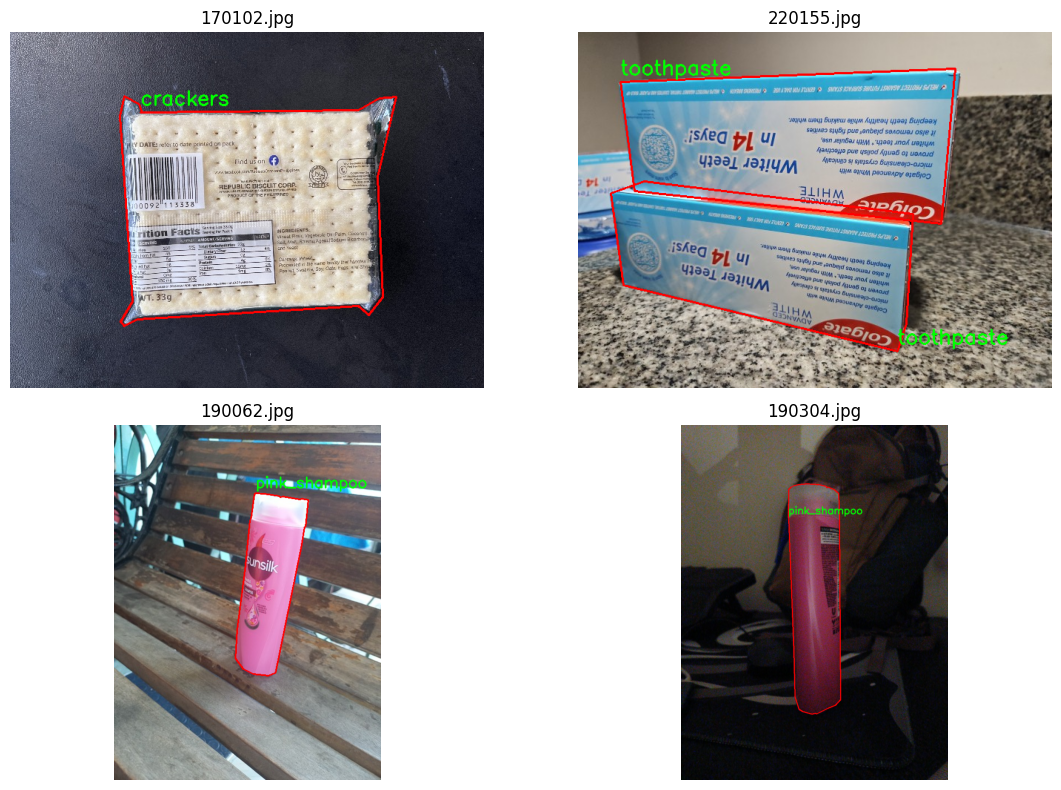

In [121]:
import cv2
import json
import os
import random
import matplotlib.pyplot as plt
import numpy as np

mode = 'train'  # Change to 'val' or 'test'
if mode == 'train':
    image_path = 'datasets/grocery/images/train'
    label_path = 'datasets/grocery/labels/train'
    coco_data = new_coco_train
elif mode == 'val':
    image_path = 'datasets/grocery/images/val'
    label_path = 'datasets/grocery/labels/val'
    coco_data = new_coco_val
else:
    image_path = 'datasets/grocery/images/test'
    label_path = 'datasets/grocery/labels/test'
    coco_data = new_coco_test

# Create a dictionary to map image IDs to file names for easy access
image_id_to_filename = {img['id']: img['file_name'] for img in coco_data['images']}

# Create a dictionary to map COCO category IDs to custom class IDs
category_id_to_custom_id = {
    1: 0,  # bottled_soda
    2: 1,  # cheese
    3: 2,  # Kitkat
    4: 3,  # coffee
    5: 4,  # condensed_milk
    6: 5,  # Cooking_oil
    7: 6,  # corned_beef
    8: 7,  # garlic
    9: 8,  # instant_noodles
    11: 9,  # lemon
    13: 10, # Mayonnaise
    14: 11, # peanut_butter
    15: 12, # pasta
    16: 13, # pineapple_juice
    17: 14, # crackers
    18: 15, # canned_sardines
    19: 16, # pink_shampoo
    20: 17, # soap
    21: 18, # silverswan
    22: 19, # toothpaste
    23: 20, # canned_tuna
    24: 21  # GreenCross_Ethyl_Alcohol
}

# Create a dictionary to map custom class IDs to category names
category_id_to_name = {
    0: 'bottled_soda',
    1: 'cheese',
    2: 'Kitkat',
    3: 'coffee',
    4: 'condensed_milk',
    5: 'Cooking_oil',
    6: 'corned_beef',
    7: 'garlic',
    8: 'instant_noodles',
    9: 'lemon',
    10: 'Mayonnaise',
    11: 'peanut_butter',
    12: 'pasta',
    13: 'pineapple_juice',
    14: 'crackers',
    15: 'canned_sardines',
    16: 'pink_shampoo',
    17: 'soap',
    18: 'silverswan',
    19: 'toothpaste',
    20: 'canned_tuna',
    21: 'GreenCross_Ethyl_Alcohol'
}

# Randomly select 4 images
selected_images = random.sample(coco_data['images'], 4)

# Define function to draw segmentation and class names
def draw_annotations(image, label_file):
    with open(label_file, 'r') as f:
        lines = f.readlines()
    
    for line in lines:
        parts = line.strip().split()
        custom_class_id = int(parts[0])
        segmentation = list(map(float, parts[1:]))
        
        # Draw segmentation mask
        points = [(int(segmentation[i] * image.shape[1]), int(segmentation[i + 1] * image.shape[0])) for i in range(0, len(segmentation), 2)]
        points = np.array(points, dtype=np.int32)
        cv2.polylines(image, [points], isClosed=True, color=(255, 0, 0), thickness=2)  # Red line
        
        # Draw class name
        class_name = category_id_to_name[custom_class_id]
        x, y = points[0]
        cv2.putText(image, class_name, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)  # Green text
    
    return image

# Plot images with annotations
plt.figure(figsize=(12, 8))

for i, img_info in enumerate(selected_images):
    # Load image
    img_path = os.path.join(image_path, img_info['file_name'])
    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Get label file for this image
    label_filename = os.path.splitext(img_info['file_name'])[0] + '.txt'
    label_file = os.path.join(label_path, label_filename)
    
    # Draw annotations on the image
    image = draw_annotations(image, label_file)
    
    # Display the image
    plt.subplot(2, 2, i + 1)
    plt.imshow(image)
    plt.axis('off')
    plt.title(img_info['file_name'])

plt.tight_layout()
plt.show()